Reading and pre-processing of time-series data for 4 stations

In [1]:
                                                                                                                                                                                                                                                                        from math import sqrt
import numpy as np
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from datetime import datetime
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import seaborn as sn
import copy

def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

df_rainfall_train = read_csv('data_new/delhi_climate/DailyDelhiClimateTrain.csv')
df_rainfall_test = read_csv('data_new/delhi_climate/DailyDelhiClimateTest.csv')
df_rainfall_train.columns = ['Date','meantemp','wind_speed','meanpressure','humidity']
df_rainfall_test.columns = ['Date','meantemp','wind_speed','meanpressure','humidity']

df= df_rainfall_train

print("Shape of df:",df.shape)
print("Shape of df_test:",df_rainfall_test.shape)


print(df.head(5))


df = df.replace(to_replace='None', value=np.nan)
df = df.dropna(axis = 0, how = 'all')
df['meantemp'].fillna(df['meantemp'].median(), inplace=True)
df['humidity'].fillna(df['humidity'].median(), inplace=True)
df['wind_speed'].fillna(df['wind_speed'].median(), inplace=True)
df['meanpressure'].fillna(df['meanpressure'].median(), inplace=True)


print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())


Shape of df: (1462, 5)
Shape of df_test: (114, 5)
         Date   meantemp  wind_speed  meanpressure   humidity
0  01-01-2013  10.000000    0.000000   1015.666667  84.500000
1  02-01-2013   7.400000    2.980000   1017.800000  92.000000
2  03-01-2013   7.166667    4.633333   1018.666667  87.000000
3  04-01-2013   8.666667    1.233333   1017.166667  71.333333
4  05-01-2013   6.000000    3.700000   1016.500000  86.833333
 
Count total NaN at each column in a DataFrame : 

 Date            0
meantemp        0
wind_speed      0
meanpressure    0
humidity        0
dtype: int64


In [2]:
features = df.loc[:, df.columns != 'Date']
features = features.astype(float)
features.head()

,meantemp,wind_speed,meanpressure,humidity
0,10.000000,0.000000,1015.666667,84.500000
1,7.400000,2.980000,1017.800000,92.000000
2,7.166667,4.633333,1018.666667,87.000000
3,8.666667,1.233333,1017.166667,71.333333
4,6.000000,3.700000,1016.500000,86.833333


Preparation of dataframe for analysis

In [3]:
df['Date'] = pd.to_datetime(df['Date'],format="%d-%m-%Y") 
df['year'] = df['Date'].dt.year 
df['month'] = df['Date'].dt.month 
df['day']=df['Date'].dt.day


#for test 
df_rainfall_test['Date'] = pd.to_datetime(df_rainfall_test['Date'],format="%d-%m-%Y") 
df_rainfall_test['year'] = df_rainfall_test['Date'].dt.year 
df_rainfall_test['month'] = df_rainfall_test['Date'].dt.month 
df_rainfall_test['day']=df_rainfall_test['Date'].dt.day

In [4]:
df_train = df
df_test = df_rainfall_test
df_train.to_csv('train_rainfall.csv')
df_test.to_csv('test_rainfall.csv')

In [1]:


                                                                                                                                                                                                                                                                        from math import sqrt
import numpy as np
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from datetime import datetime
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import seaborn as sn
import copy

1 months ahead prediction using Univariate UBD-LSTM model

In [2]:



dataset_train = read_csv('train_rainfall.csv', header=0, index_col=0)
dataset_test = read_csv('test_rainfall.csv', header=0, index_col=0)
values_train = dataset_train.values
values_test = dataset_test.values
values_train=values_train[:,-4]
values_test=values_test[:,-4]
values_train = values_train.astype('float32')
values_test = values_test.astype('float32')
# scaler = MinMaxScaler(feature_range=(0, 1))
concat = np.concatenate((values_train,values_test),axis = 0)
# print(concat.shape)
# maxv = max(concat)
# minv = min(concat)
# scaled = (concat-minv)/(maxv-minv)

# scaled_train = scaled #all the data is here
print("intial size",concat.shape)

print(concat[0:7]+concat[365:372])





intial size (1576,)
[174.125   170.375   161.875   159.45834 175.83334 169.08572 150.88571]


In [3]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 2016 is a leap year
#we start from 1st jan 2013 and go up till 24  april 2017
# concat has entries from those dates
# size of data is 1576

i=0
new_1=np.array([])
new_2=np.array([])
while(i<365):
    j=i
    arr=np.array([])
    if i<109:
        for k in range(4):
            arr=np.append(arr,concat[j:j+7])
            j+=365
    else:
        for k in range(3):
            arr=np.append(arr,concat[j:j+7])
            j+=365
    mu,sigma=norm.fit(arr)
    new_1 = np.append(new_1, norm.rvs(loc=mu,scale=sigma,size=7))
    new_2 = np.append(new_2, norm.rvs(loc=mu,scale=sigma,size=7))
    i+=7
new_d=np.append(new_1,new_2)
print(new_d)

[ 77.24250825  87.63783925  70.9477909   66.67801417  90.64187814
  94.62582403  77.04721903  75.76549122  60.20254691  79.29019509
  89.61112706  82.25233562  82.66999629  75.86774316  79.32611927
  83.30664628  92.46230637  91.45770586  77.95832552  79.90081197
  86.42392144  88.95669063  51.75363891  77.98782883  70.49048654
  67.79614773  79.7257166   60.49512521  68.90599362  80.33527541
  65.78954721  65.515846    68.43314849  71.25513772  83.08239197
  72.44806297  72.77669671  72.65691683  68.80577224  68.05630588
  59.58820098  54.64757075  72.43153762  80.34979322  66.34943185
  82.87805537  63.98882421  59.31099157  58.64894605  61.63819364
  66.81221205  60.20851252  65.30658713  87.56890655  50.5554018
  59.53926693  59.98238071  65.94172576  57.26649716  75.76961021
  84.07715544  66.89426515  61.71274206  64.25486479  57.79161466
  51.47812301  53.81406561  50.73649718  61.0445166   69.84593585
  85.83987065  61.02887056  67.90747825  59.32334384  71.1482828
  63.6253191

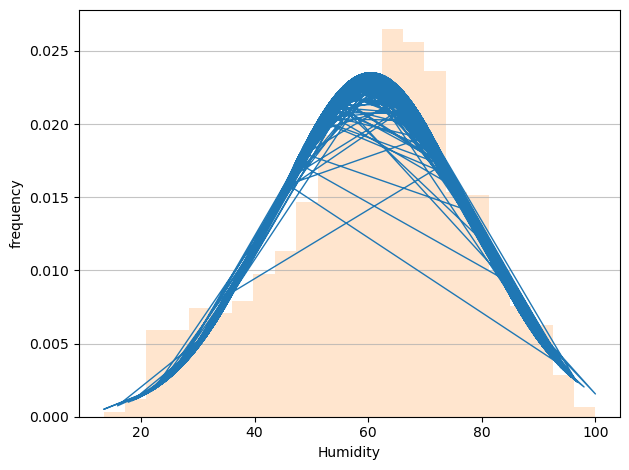

In [5]:
# plt.plot(concat, norm.pdf(concat),'k-', lw=2, label='norm pdf')
mu,sigma=norm.fit(concat)
plt.plot(concat,norm.pdf(concat,loc=mu,scale=sigma),lw=1)
plt.hist(concat, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Humidity')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

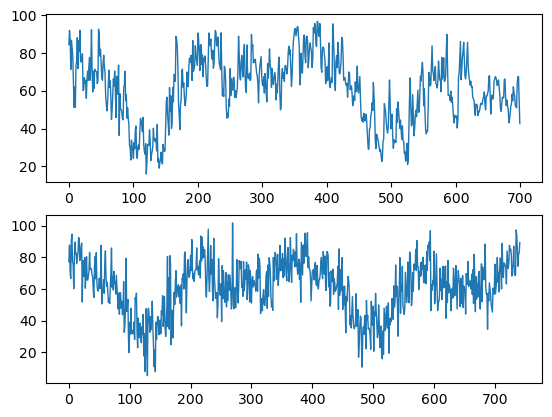

In [6]:
plt.subplot(2, 1, 1)
plt.plot(concat[:700],lw=1)
plt.subplot(2, 1, 2)
plt.plot(new_d,lw=1)





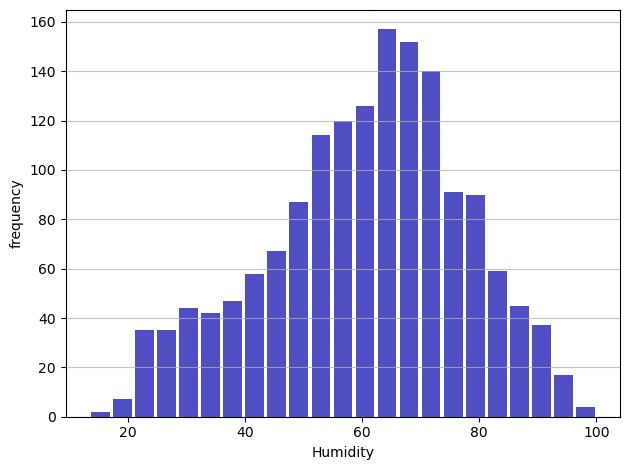

In [7]:
n, bins, patches = plt.hist(x=concat, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Humidity')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

In [8]:
mu,sigma=norm.fit(concat)

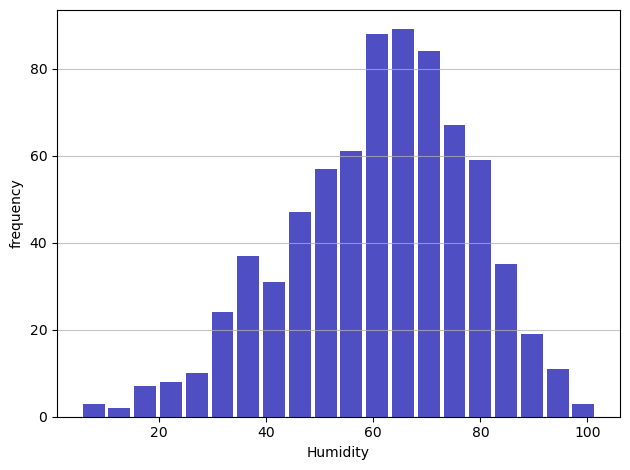

In [9]:

n, bins, patches = plt.hist(x=new_d, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Humidity')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

In [10]:
##started from 1st jan 2019

from datetime import date, datetime, timedelta
import csv
time1 = time.time()
delta = timedelta(**{'hours': 8})
start = datetime(2019,1,1) #change to change start date
current = start

f = open('results/Rainfall/new_predicted_data.csv','w',newline='')
outfile_monthly=csv.writer(f)
outfile_monthly.writerow(["From Date","Humidity"])
for item in new_d:
          item = round(item,4)
          for ii in range(3):
              outfile_monthly.writerow([current,item])
              current += delta
f.close() 

In [11]:


                                                                                                                                                                                                                                                                        from math import sqrt
import numpy as np
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from datetime import datetime
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import seaborn as sn
import copy

In [12]:



dataset_train = read_csv('train_rainfall.csv', header=0, index_col=0)
dataset_test = read_csv('test_rainfall.csv', header=0, index_col=0)
values_train = dataset_train.values
values_test = dataset_test.values
values_train=values_train[:,1:5]
values_test=values_test[:,1:5]
values_train = values_train.astype('float32')
values_test = values_test.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
concat = np.concatenate((values_train,values_test),axis = 0)
#maxv = max(concat[:,-1])
#minv = min(concat[:,-1])
minv = np.min(concat[:,:-2], axis=0) ## pressure is not included
maxv= np.max(concat[:,:-2],axis=0)
scaled = scaler.fit_transform(concat)
min_d=min(new_d)
max_d=max(new_d)
scaled_new_d= (new_d-min_d)/(max_d-min_d)
scaled_train=scaled[130:1276]
scaled_val=scaled[:130]
scaled_test=scaled[1276:]
print("intial size",scaled.shape)
print(minv)
print(maxv)
print(maxv-minv)
# has 1576 rows use 158 for validation




intial size (1576, 4)
[6. 0.]
[38.714287 42.22    ]
[32.714287 42.22    ]


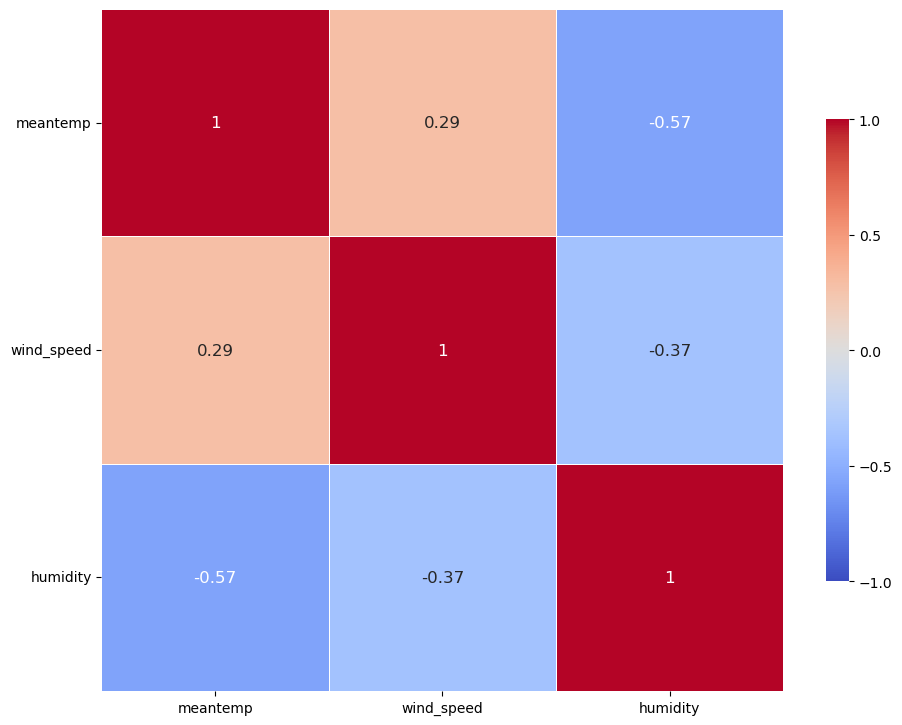

In [13]:
a=read_csv('train_rainfall.csv',usecols=["meantemp","wind_speed","humidity"])
b=read_csv('test_rainfall.csv',usecols=["meantemp","wind_speed","humidity"])

c=pd.concat([a,b])
corr_matrix =  c.corr()
f, ax = plt.subplots(figsize=(11, 15))
heatmap = sn.heatmap(corr_matrix,
                      #mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sn.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [14]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from numpy import array
import datetime
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dropout
# 3 day in 1 day out
# here sequence will be the new data containing all the 4 new parameters
def split_sequences(sequences, n_steps_in):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
    # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        
        seq_x, seq_y = sequences[i:end_ix, -1], sequences[end_ix-1, :-2] # seq x is seq to humidity and seq y are the other 2 parameters for the day
        X.append(seq_x)     # n_steps_in number of columns and 1 row , 1 row and 3 columns
        y.append(seq_y)
    return array(X), array(y) # x is of size- steps,1 and y(contains the mean temp and mean speed) is of size 1,2

def split_seq(seq,n_steps_in):
    x=list()
    for i in range(len(seq)):
        end_ix=i+n_steps_in
        if end_ix> len(seq):
            break
        x.append(seq[i:end_ix])
    return array(x)


# print(pred_X) ## new input
# should i train seperate model for each paramter or in same?
# train_X, train_y = split_sequences(scaled,4) ## train x is the humidity sequence and train y is the temp and wind at end day
# test_X,test_Y=split_sequences(scaled_test,4)

# print(train_X)
# print(train_y)




In [15]:
# def MODEL_Bi_LSTM(train_X,pred_X,train_y,val_X,val_y,n_in,minv,maxv):
#     model = Sequential()
#     model.add(Bidirectional(LSTM(50, activation='relu',input_shape=(n_in,1))))
#     # added another layer as done in tut for vector output 
#     model.add(Dense(50, activation='relu'))
#     model.add(Dense(2)) #to predict 2 parameters
#     model.compile(optimizer='adam', loss='mse')
#     model.fit(train_X, train_y, epochs=200, batch_size=20, validation_data=(val_X, val_y), verbose=0, shuffle=False)
#     # test shall contain the data from 2013 to 17 (also use some part of it for validation)
#     yhat11 = model.predict(pred_X, verbose=0)
#     return ( (maxv-minv)*yhat11 + minv)
    
# f = open('results/Rainfall/new_data_wind_temp.csv','w',newline='')
# outfile_monthly=csv.writer(f)
# outfile_monthly.writerow(["Temperature","Windspeed"])
# # for item in new_d:
# #           item = round(item,4)
# #           for ii in range(3):
# #               outfile_monthly.writerow([current,item])
# #               current += delta



# for j in range(1,31):
#     for m in range(5,6):

#         n_in=4
#         print("Number of steps predicted= ",1,"Number of steps Multivariate threads ussed= ",n_in, "iteration number= ",j)

#         train_X, train_y = split_sequences(scaled_train,n_in)
#         val_X, val_y = split_sequences(scaled_val,n_in)
#         val_X = val_X.reshape(val_X.shape[0] , val_X.shape[1] , 1)
#         train_X = train_X.reshape(train_X.shape[0] , train_X.shape[1] , 1)
#         print(val_X.shape,val_y.shape)
#         print("train_X.shape, train_y.shape =",train_X.shape, train_y.shape)
#         print("pred_x.shape=",pred_X.shape)
#         print("val X, val y",val_X.shape, val_y.shape)
#         for item in MODEL_Bi_LSTM(train_X,pred_X,train_y,val_X,val_y,n_in,minv,maxv):# n_out will be 1 with 3 parameters n_in will be 3 
#             outfile_monthly.writerow(item)
# print("MODEL_Bi_LSTM:",time2-time1)
# f.close() 

In [16]:
def MODEL_Bi_LSTM_err(train_X,test_X,train_y,test_y,val_X,val_y,pred_X,n_in,minv,maxv):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu',input_shape=(n_in,1))))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(2))
    model.compile(optimizer='adam', loss='mse')
# fit model
    # Important note : epochs = 50 for seasonal model
    model.fit(train_X, train_y, epochs=200, batch_size=20, validation_data=(val_X, val_y), verbose=0, shuffle=False)
    yhat11 = model.predict(test_X, verbose=0)
    yhat11_inv = ((maxv - minv) * yhat11  + minv)
    test_y_inv = ((maxv - minv) * test_y  + minv)
    err = np.sqrt(((np.sum((yhat11_inv-test_y_inv)**2,axis=0))))
    print("error for test step is =",err )
    yhat12 = model.predict(train_X, verbose = 0)
    yhat12_inv = ((maxv - minv) * yhat12  + minv)
    train_y_inv = ((maxv - minv) * train_y  + minv)
    err2 = np.sqrt(((np.sum((yhat12_inv-train_y_inv)**2,axis=0))))
    print("error for train step is =",err2 )
    yhat = model.predict(pred_X, verbose=0)
#     print ("predictions-", (maxv-minv)*yhat + minv)
    
    return err , err2, ((maxv-minv)*yhat + minv)

In [18]:
# f = open('results/Rainfall/new_data_wind_temp.csv','w',newline='')
# outfile_monthly=csv.writer(f)
# outfile_monthly.writerow(["Temperature","Windspeed"])
ff= open('results/Rainfall/error.csv','w',newline='')
outfile_monthly_err=csv.writer(ff)
outfile_monthly_err.writerow(["Temperature_error","Windspeed_error"])
for j in range(1):
    n_in=4
    print("Number of steps predicted= ",1,"Number of steps Multivariate threads ussed= ",n_in, "iteration number= ",j)

    train_X, train_y = split_sequences(scaled_train,n_in)
    val_X, val_y = split_sequences(scaled_val,n_in)
    test_X,test_Y= split_sequences(scaled_test,n_in)
    val_X = val_X.reshape(val_X.shape[0] , val_X.shape[1] , 1)
    train_X = train_X.reshape(train_X.shape[0] , train_X.shape[1] , 1)
    test_X=test_X.reshape(test_X.shape[0],test_X.shape[1],1)
    pred_X=split_seq(scaled_new_d,4)
    pred_X=pred_X.reshape(pred_X.shape[0] , pred_X.shape[1] , 1)
    print(val_X.shape,val_y.shape)
    print("train_X.shape, train_y.shape =",train_X.shape, train_y.shape)
    print("pred_x.shape=",pred_X.shape)
    print("val X, val y",val_X.shape, val_y.shape)
    e1,e2,c=MODEL_Bi_LSTM_err(train_X,test_X,train_y,test_Y,val_X,val_y,pred_X,n_in,minv,maxv)
#     for item in c:# n_out will be 1 with 3 parameters n_in will be 3 
#             outfile_monthly.writerow(item)
#     outfile_monthly.writerow([j,n_in])
    outfile_monthly_err.writerow([e1,e2])
    
f.close() 

Number of steps predicted=  1 Number of steps Multivariate threads ussed=  4 iteration number=  0
(127, 4, 1) (127, 2)
train_X.shape, train_y.shape = (1143, 4, 1) (1143, 2)
pred_x.shape= (739, 4, 1)
val X, val y (127, 4, 1) (127, 2)
error for test step is = [114.59014   61.226738]
error for train step is = [192.59125 140.95908]


In [55]:
for j in range(10):
    n_in=5
    print("Number of steps predicted= ",1,"Number of steps Multivariate threads ussed= ",n_in, "iteration number= ",j)

    train_X, train_y = split_sequences(scaled_train,n_in)
    val_X, val_y = split_sequences(scaled_val,n_in)
    test_X,test_Y= split_sequences(scaled_test,n_in)
    val_X = val_X.reshape(val_X.shape[0] , val_X.shape[1] , 1)
    train_X = train_X.reshape(train_X.shape[0] , train_X.shape[1] , 1)
    test_X=test_X.reshape(test_X.shape[0],test_X.shape[1],1)
    pred_X=split_seq(scaled_new_d,4)
    pred_X=pred_X.reshape(pred_X.shape[0] , pred_X.shape[1] , 1)
    MODEL_Bi_LSTM_err(train_X,test_X,train_y,test_Y,val_X,val_y,pred_X,n_in,minv,maxv)

Number of steps predicted=  1 Number of steps Multivariate threads ussed=  5 iteration number=  0
error for test step is = [113.85123  61.92134]
error for train step is = [191.41188 141.80574]
predictions- [[18.683762   4.654005 ]
 [19.462002   4.447774 ]
 [19.55547    3.905793 ]
 ...
 [19.253538   4.0220394]
 [18.785841   4.0051007]
 [18.804955   4.2301817]]
Number of steps predicted=  1 Number of steps Multivariate threads ussed=  5 iteration number=  1
error for test step is = [114.26342   60.734333]
error for train step is = [191.42668 140.45657]
predictions- [[19.019665   4.6006074]
 [19.555595   4.806257 ]
 [19.32096    3.8417552]
 ...
 [19.297832   4.324716 ]
 [18.548096   3.5623403]
 [18.566235   3.4918036]]
Number of steps predicted=  1 Number of steps Multivariate threads ussed=  5 iteration number=  2
error for test step is = [114.07965   61.543163]
error for train step is = [191.64305 140.19106]
predictions- [[18.822922   5.2818832]
 [19.659746   5.979767 ]
 [19.53289    3.